## O(n^2) algorithms (selection, bubble, insertion)

    I. Count the number of comparisons (selection vs bubble vs insertion)
        (1) Best case comparison (pre sorted sequences)
        (2) Worst case comparison (reverse sorted sequences)
        (3) Average case comparison (random numbers)

In [2]:
from matplotlib import pyplot as plt
from Algorithms import selection_sort, insertion_sort,  bubble_sort, get_Unsortedness, bucketSort, shell_sort_shell, shell_sort_ciura, radix_sort_insert, radix_sort_count, merge_sort, quick_sort
from Tests import test_case, test_case2, test_set_best_case, test_set_worst_case, random_test, sorted_test, reverse_sorted_test, bestcase_bucket, consecutive_test
import random

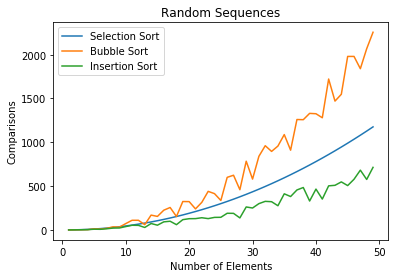

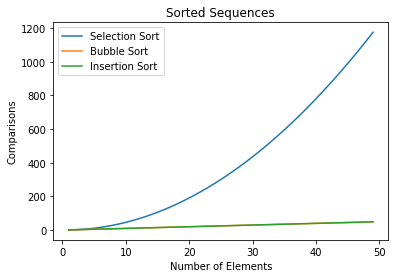

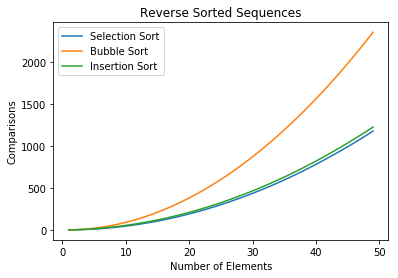

In [3]:
x = []
rny1 = []
rny2 = []
rny3 = []
sy1 = []
sy2 = []
sy3 = []
rvy1 = []
rvy2 = []
rvy3 = []

for i in range(1, 50):
       l = random.sample(range(0, 100000), i)
       x.append(i)
       rny1.append(selection_sort(list(l))[0])
       rny2.append(bubble_sort(list(l))[0])
       rny3.append(insertion_sort(list(l),1))
       sy1.append(selection_sort(list(sorted(l)))[0]) 
       sy2.append(bubble_sort(list(sorted(l)))[0]) 
       sy3.append(insertion_sort(list(sorted(l)),1))
       rvy1.append(selection_sort(list(sorted(l, reverse=True)))[0]) 
       rvy2.append(bubble_sort(list(sorted(l, reverse=True)))[0]) 
       rvy3.append(insertion_sort(list(sorted(l, reverse=True)),1)) 
    
plt.close('all')
f, ax = plt.subplots()
plt.xlabel('Number of Elements')
plt.ylabel('Comparisons')
ax.plot(x, rny1)
ax.plot(x, rny2)
ax.plot(x, rny3)
ax.set_title('Random Sequences')
ax.legend(['Selection Sort', 'Bubble Sort', 'Insertion Sort'])

f, ax = plt.subplots()
plt.xlabel('Number of Elements')
plt.ylabel('Comparisons')
ax.plot(x, sy1)
ax.plot(x, sy2)
ax.plot(x, sy3)
ax.set_title('Sorted Sequences')
ax.legend(['Selection Sort', 'Bubble Sort', 'Insertion Sort'])

f, ax = plt.subplots()
plt.xlabel('Number of Elements')
plt.ylabel('Comparisons')
ax.plot(x, rvy1)
ax.plot(x, rvy2)
ax.plot(x, rvy3)
ax.set_title('Reverse Sorted Sequences')
ax.legend(['Selection Sort', 'Bubble Sort', 'Insertion Sort'])
plt.show()

### Insertion Sort

## Shell sort optimization 

    I. Insertion sort VS shell sort with insertion sort as subroutine
        (1) on pre sorted sequences
        (2) reverse sorted sequnces
        (3) random numbers
    
    II. Insertion sort using different gaps (random numbers)
        (1) Shell's gaps vs. Ciura's gaps

### Insertion Sort VS. Shell Insertion Sort

In [4]:
def test_cases_init():
    ranges = [10,20,50,100,150,200,250,300]
    presorted = []
    reversedsorted = []
    random_ = []

    for r in ranges:
        i = 1
        arr = []
        while (i <= r):
            arr.append(i)
            i +=1
        presorted.append(arr)
        reversedsorted.append(arr[::-1])
        random_.append(list(random.sample(range(0, r), r) ))

    return presorted, reversedsorted, random_

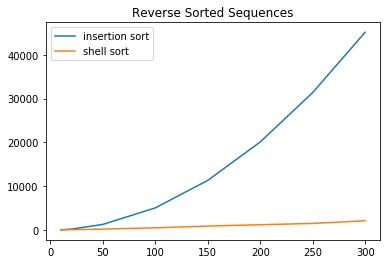

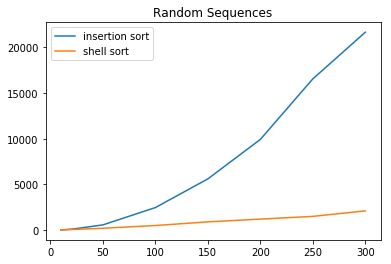

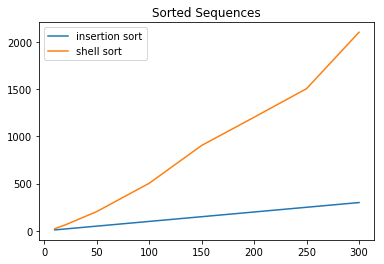

In [5]:
def shell_vs_insertion_eval():
    x_values = [10,20,50,100,150,200,250,300]
    # no. of comparisons
    shell_y_values = []
    insertion_y_values = []

    test_cases = test_cases_init()
    presorted = test_cases[0]
    reversedsorted = test_cases[1]
    #random = []

    ## REVERSE SORTED SEQUENCES
    for case in reversedsorted:
        result = insertion_sort(case,1)
        insertion_y_values.append(result)

    plt.plot(x_values, insertion_y_values)

    presorted = test_cases[1]
    for case in reversedsorted:
        result = shell_sort_shell(case)
        shell_y_values.append(result[3])

    plt.plot(x_values, shell_y_values)
    plt.title("Reverse Sorted Sequences")
    plt.legend(['insertion sort','shell sort'], loc='upper left')
    plt.show()
    
    ## RANDOM SEQUENCES
    insertion_y_values = []
    shell_y_values = []
    random = test_cases[2]
    for case in random:
        result = insertion_sort(case,1)
        insertion_y_values.append(result)

    plt.plot(x_values, insertion_y_values)
    
    random = test_cases[2]
    for case in random:
        result = shell_sort_shell(case)
        shell_y_values.append(result[3])

    plt.plot(x_values, shell_y_values)
    plt.title("Random Sequences")
    plt.legend(['insertion sort','shell sort'], loc='upper left')
    plt.show()

    ## PRESORTED SEQUENCES
    insertion_y_values = []
    shell_y_values = []
    for case in presorted:
        result = insertion_sort(case,1)
        insertion_y_values.append(result)

    plt.plot(x_values, insertion_y_values)

    presorted = test_cases[0]
    for case in presorted:
        result = shell_sort_shell(case)
        shell_y_values.append(result[3])

    plt.plot(x_values, shell_y_values)
    plt.title("Sorted Sequences")
    plt.legend(['insertion sort','shell sort'], loc='upper left')
    plt.show()


shell_vs_insertion_eval()

### Shell's Gap VS. Ciura's Gap

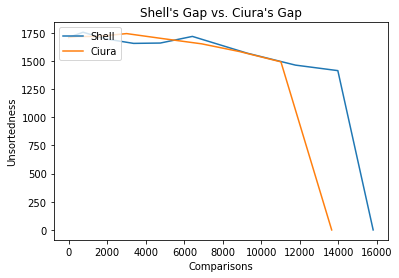

In [ ]:
import matplotlib.pyplot as plt

def shell_vs_ciura_eval():

    l = []
    l_2 = []
    for i in range(1, 1000):
        x = random_test()
        l.append(x[0])
        l_2.append(x[0])
        
    shell_result = shell_sort_shell(l)
    comparisons_x_shell = shell_result[1]
    usortedness_y_shell = shell_result[2]

    ciura_result = shell_sort_ciura(l_2)
    comparisons_x_ciura = ciura_result[1]
    usortedness_y_ciura = ciura_result[2]


    plt.title("Shell's Gap vs. Ciura's Gap")
    plt.plot(comparisons_x_shell, usortedness_y_shell)
    plt.plot(comparisons_x_ciura, usortedness_y_ciura)
    plt.xlabel('Comparisons')
    plt.ylabel('Unsortedness')
        
    plt.legend(['Shell','Ciura'], loc='upper left')
    plt.show()

shell_vs_ciura_eval()

## Bucket sort optimization

    I. Bucket sort on different distributions (use insertion sort as subroutine)



In [ ]:
import math
import matplotlib.pyplot as plot
distribution1 = [10,11,12,17,22,23,24,25,26,18,19,20,21,27,28,29,13,14,15,16]
distribution2 = [1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5]
distribution3 = [1,4,5,7,8,5,43,6,8,9,10,14,11,45,34]
dist = consecutive_test()


#for making the graphs
sortedArr, buckets, comparisons = bucketSort(dist)

print("Random Case: ", sortedArr)

#print("Random Case: %s " % bucketSort(distribution2))
#print("Random Case: %s " % bucketSort(distribution3))

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

height = []
ex = []

#of buckets
for i in range(0, len(buckets)):
        height.append(i + 1)

        
for i in range(0, len(buckets)):
            ex.append(len(buckets[i]))
          
        
y_pos = np.arange(len(height))
plt.bar(y_pos, ex, align='center', alpha=0.5)
plt.xticks(y_pos, height)


plt.ylabel('Amount inside each bucket')
plt.xlabel('Number of Buckets')
plt.title('Bucket Sort with Best Case Distribution')
 
plt.show()

cases = bestcase_bucket()

x = []
y = []
for case in cases:
    comparisons = bucketSort(case)[2]
    x.append(len(case))
    y.append(comparisons)
    
print(x)
print(y)
plt.plot(x, y)
plt.ylabel('Array size')
plt.xlabel('Comparisons')
plt.title('Bucket Sort with Best Case Distribution')
 
plt.show()


In [ ]:
sortedArr1, buckets1, comparisons1 = bucketSort(distribution2)

height1= []
ex1 = []

#of buckets
for i in range(0, len(buckets1)):
        height1.append(i + 1)

        
for i in range(0, len(buckets1)):
            ex1.append(len(buckets1[i]))
          
        
y_pos = np.arange(len(height1))
plt.bar(y_pos, ex1, align='center', alpha=0.5)
plt.xticks(y_pos, height1)


plt.ylabel('Amount inside each bucket')
plt.xlabel('Number of Buckets')
plt.title('Bucket Sort with Worst Case Distribution')
 
plt.show()


In [ ]:
sortedArr2, buckets2, comparisons2 = bucketSort(distribution3)

height2= []
ex2 = []

#of buckets
for i in range(0, len(buckets2)):
        height2.append(i + 1)

        
for i in range(0, len(buckets2)):
            ex2.append(len(buckets2[i]))
          
        
y_pos = np.arange(len(height2))
plt.bar(y_pos, ex2, align='center', alpha=0.5)
plt.xticks(y_pos, height2)


plt.ylabel('Amount inside each bucket')
plt.xlabel('Number of Buckets')
plt.title('Bucket Sort with Normal Distribution')
 
plt.show()


## Radix sort optimization

    I. Radix sort with counting sort as subroutine vs radix sort with insertion sort
        (1) pre sorted
        (2) reverse sorted
        (3) Random

In [ ]:
import itertools
def radix_sort_optimization():
    
#     reverse_sorted = test_case2()
    random = []
    
    ## PRESORTED SEQUENCES
    presorted = test_case()
    count = radix_sort_count(presorted)
    presorted = test_case()
    insert = radix_sort_insert(presorted)
    
    result_count = [(key, sum(i[1] for i in group)) for key, group in itertools.groupby(sorted(count, key = lambda i: i[0]), lambda i: i[0])]
    result_insert = [(key, sum(i[1] for i in group)) for key, group in itertools.groupby(sorted(insert[1], key = lambda i: i[0]), lambda i: i[0])]

   
    count_x = []
    count_y = []
    for t in result_count:
        count_x.append(t[0])
        count_y.append(t[1])
        
    insert_x = []
    insert_y = []
    for t in result_insert:
        insert_x.append(t[0])
        insert_y.append(t[1])
    
    plt.plot(insert_x, insert_y)
    plt.plot(count_x, count_y)
    plt.title("Presorted Sequences")
    plt.legend(['radix insertion sort','radix counting sort'], loc='upper left')
    
    plt.show()
    
     ## Reverse Sorted SEQUENCES
    reverse = test_case2()
    count = radix_sort_count(presorted)
    reverse = test_case2()
    insert = radix_sort_insert(presorted)
    
    result_count = [(key, sum(i[1] for i in group)) for key, group in itertools.groupby(sorted(count, key = lambda i: i[0]), lambda i: i[0])]
    result_insert = [(key, sum(i[1] for i in group)) for key, group in itertools.groupby(sorted(insert[1], key = lambda i: i[0]), lambda i: i[0])]

    count_x = []
    count_y = []
    for t in result_count:
        count_x.append(t[0])
        count_y.append(t[1])
        
    insert_x = []
    insert_y = []
    for t in result_insert:
        insert_x.append(t[0])
        insert_y.append(t[1])
        
    plt.plot(insert_x, insert_y)
    plt.plot(count_x, count_y)
    plt.title("Reverse Sorted Sequences")
    plt.legend(['radix insertion sort','radix counting sort'], loc='upper left')
    
    plt.show()
    
    l = []
    l_2 = []
    for i in range(1, 200):
        x = random_test()
        l.append(x[0])
        l_2.append(x[0])
        
    ## Random SEQUENCES
    count = radix_sort_count(l)
    insert = radix_sort_insert(l_2)
    
    result_count = [(key, sum(i[1] for i in group)) for key, group in itertools.groupby(sorted(count, key = lambda i: i[0]), lambda i: i[0])]
    result_insert = [(key, sum(i[1] for i in group)) for key, group in itertools.groupby(sorted(insert[1], key = lambda i: i[0]), lambda i: i[0])]

    count_x = []
    count_y = []
    for t in result_count:
        count_x.append(t[0])
        count_y.append(t[1])
        
    insert_x = []
    insert_y = []
    for t in result_insert:
        insert_x.append(t[0])
        insert_y.append(t[1])
        
    plt.plot(insert_x, insert_y)
    plt.plot(count_x, count_y)
    plt.title("Random Sorted Sequences")
    plt.legend(['radix insertion sort','radix counting sort'], loc='upper left')
    
    plt.show()
    
radix_sort_optimization()

## Merge sort vs Quick Sort

    I. Merge sort vs quick sort on random numbers

In [ ]:
def merge_vs_quick():
    l = []
    cases = []
    cases_copy = []
    comparisons = []
    comparisons_ = []
    x = []
    for i in range(10, 50):
        l = random.sample(range(0, 1000), i)
        l2 = list(l)
        comparisons.append(quick_sort(l, 0, len(l)-1))
        comparisons_.append(merge_sort(l2, 0, len(l2)-1))
        x.append(i)
        
        
    plt.plot(x, comparisons)
    plt.plot(x, comparisons_)
    
    plt.xlabel('Number of Elements')
    plt.ylabel('Comparisons')
        
    plt.title("Merge Sort vs Quick Sort on Random Sorted Sequences")
    plt.legend(['quick sort','merge sort'], loc='upper left')
    
    plt.show()
        
    
        
    
#     print (cases)
    
merge_vs_quick()


In [ ]:
import numpy as np
import time
quickSortTimes = []
mergeSortTimes = []
sizes = [10**i for i in range(1,5)]
for i in sizes:
    randomList = np.random.randint(1,1000000000,size=i)
    
    startTime = time.time()
    quickList = np.sort(randomList,kind='quicksort')
    runTime = time.time()-startTime
    quickSortTimes.append(runTime)
    
    startTime = time.time()
    mergeList = np.sort(randomList,kind='mergesort')
    runTime = time.time()-startTime
    mergeSortTimes.append(runTime)
    
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(sizes,quickSortTimes,marker='x',c='b',label='Quicksort')
plt.plot(sizes,mergeSortTimes,marker='x',c='r',label='Mergesort')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("size of random list - log scale")
plt.ylabel("seconds of computation - log scale")
plt.legend(loc=2)
plt.title("Quicksort vs Mergesort")

plt.subplot(1,2,2)
plt.plot(sizes,quickSortTimes,marker='x',c='b',label='Quicksort')
plt.plot(sizes,mergeSortTimes,marker='x',c='r',label='Mergesort')
plt.xlabel("size of random list")
plt.ylabel("seconds of computation")
plt.legend(loc=2)
plt.title("Quicksort vs Mergesort")

plt.show()